In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [ ]:
# Hyper-parameters
batch_size = 32
learning_rate = 10 ** -3
momentum = 0.7


train_set = torchvision.datasets.CIFAR10(
    root='./data', train=True, transform=transforms.ToTensor(), download=True)

test_set = torchvision.datasets.CIFAR10(
    root='./data', train=False,transform=transforms.ToTensor())

# Dataloaders
test_loader = torch.utils.data.DataLoader(
    dataset=test_set, batch_size=batch_size, shuffle=False)

_train_loader = torch.utils.data.DataLoader(
    dataset = train_set, batch_size = batch_size, shuffle=False
)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


torch.Size([3, 32, 32])

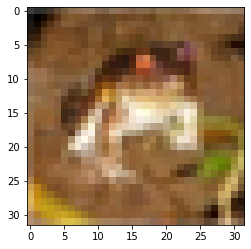

In [ ]:
plt.imshow(np.transpose(train_set.__getitem__(0)[0].numpy(), (1,2,0)))
train_set.__getitem__(0)[0].shape

In [ ]:
images = []
for img, label in _train_loader:
    images.append(img)

meanlist_train = [np.concatenate(images)[:,i].mean() for i in range(3)]
stdlist_train = [np.concatenate(images)[:,i].std() for i in range(3)]
print("mean: ", meanlist_train, "std: ", stdlist_train)


images = []
for img, label in test_loader:
  images.append(img)

meanlist_test = [np.concatenate(images)[:,i].mean() for i in range(3)]
stdlist_test = [np.concatenate(images)[:,i].std() for i in range(3)]
print("mean: ", meanlist_test, "std: ", stdlist_test)


mean:  [0.49139968, 0.48215827, 0.44653124] std:  [0.24703233, 0.24348505, 0.26158768]
mean:  [0.49421427, 0.48513183, 0.45040932] std:  [0.24665256, 0.24289224, 0.26159248]


In [ ]:

train_set = torchvision.datasets.CIFAR10(
    root='./data', train=True, transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((meanlist_train[0], meanlist_train[1], meanlist_train[2]), (stdlist_train[0], stdlist_train[1], stdlist_train[2])),]), download=True)

# 1.1.2

test_set = torchvision.datasets.CIFAR10(
    root='./data', train=False,transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((meanlist_test[0], meanlist_test[1], meanlist_test[2]), (stdlist_test[0], stdlist_test[1], stdlist_test[2])),]))

test_loader = torch.utils.data.DataLoader(
    dataset=test_set, batch_size=batch_size, shuffle=False)


print("Training set size: ", train_set.__len__())
print("Test set size: ", test_set.__len__())

Files already downloaded and verified
Training set size:  50000
Test set size:  10000


In [ ]:
# Split the training data into training and validation parts.
# here we will use `torch.utils.data.SubsetRandomSampler`.

idx = np.arange(train_set.__len__())

# Use last 5000 images for validation
train_indices= idx[:45000]
val_indices = idx[-5000:]


train_sampler = torch.utils.data.SubsetRandomSampler(train_indices)
valid_sampler = torch.utils.data.SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, sampler=train_sampler, num_workers=2)
valid_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, sampler=valid_sampler, num_workers=2)
#1.1.3

In [ ]:
class ConvNet(nn.Module):
    def __init__(self):

        super(ConvNet, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=, out_channels=, kernel_size= )

In [ ]:

class ConvNet(nn.Module):
    def __init__(self): # just example.
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        #input size=b_s,3,32,32 out=b_s,32,30,30
        self.conv2 = nn.Conv2d(32, 32, 3)
        #input size=b_s,32,30,30 out=b_s,32,28,28
        self.pool1 = nn.MaxPool2d(2, 2)
        #input size=b_s,32,28,28 out=b_s,32,14,14
        self.conv3 = nn.Conv2d(32, 64, 3)
        #input size=b_s,32,14,14 out=b_s,64,12,12
        self.conv4 = nn.Conv2d(64, 64, 3)
        #input size=b_s,32,12,12 out=b_s,32,10,10
        self.pool2 = nn.MaxPool2d(2, 2)
        #input size=out=b_s,32,10,10 out=out=b_s,64,5,5
        self.fc1 = nn.Linear(64 * 5 * 5, 512)
        self.fc2 = nn.Linear(512, 10)

        self.droput = nn.Dropout(p = 0.5)

    def forward(self, x):
        x = F.relu(self.conv1(x)) # conv, pool.
        x = self.pool1(F.relu(self.conv2(x))) # conv, pool.

        x = self.droput(x)

        x = F.relu(self.conv3(x)) # conv, pool.
        x = self.pool2(F.relu(self.conv4(x))) # conv, pool.

        x = self.droput(x)

        x = x.view(-1, 64 * 5 * 5) # linearlize input "images". TODO  x = x.view(-1, 64 * 5 * 5)

        x = F.relu(self.fc1(x)) # fully connected.

        x = self.droput(x)

        x = self.fc2(x) # fully connected.

        return x





model = ConvNet()
model = model.to(device)  # put all model params on GPU.

# Create loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)




trainLoss = []
trainAccuracy = []
validLoss = []
validAccuracy = []




# Training

num_epochs = 50
torch.manual_seed(0)
np.random.seed(0)

epoch: 1, steps: 0, train_loss: 2.299, running_acc: 18.8 %
epoch: 1, steps: 200, train_loss: 2.303, running_acc: 10.2 %
epoch: 1, steps: 400, train_loss: 2.301, running_acc: 10.6 %
epoch: 1, steps: 600, train_loss: 2.300, running_acc: 11.1 %
epoch: 1, steps: 800, train_loss: 2.299, running_acc: 10.9 %
epoch: 1, steps: 1000, train_loss: 2.297, running_acc: 11.4 %
epoch: 1, steps: 1200, train_loss: 2.292, running_acc: 13.1 %
epoch: 1, steps: 1400, train_loss: 2.288, running_acc: 13.0 %
Validation accuracy: 18.7 %
Validation error rate:  81.30 %
epoch: 2, steps: 0, train_loss: 2.278, running_acc: 15.6 %
epoch: 2, steps: 200, train_loss: 2.265, running_acc: 14.6 %
epoch: 2, steps: 400, train_loss: 2.240, running_acc: 16.8 %
epoch: 2, steps: 600, train_loss: 2.195, running_acc: 19.5 %
epoch: 2, steps: 800, train_loss: 2.160, running_acc: 21.0 %
epoch: 2, steps: 1000, train_loss: 2.109, running_acc: 22.6 %
epoch: 2, steps: 1200, train_loss: 2.077, running_acc: 23.9 %
epoch: 2, steps: 1400, t

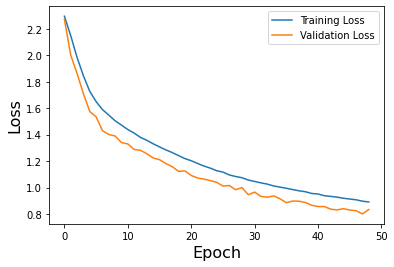

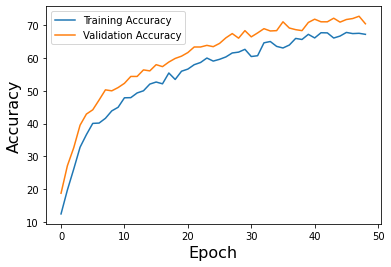

In [ ]:

for epoch in range(1, num_epochs):


    trainMeanLoss = []
    trainAccuracyMean = []
    validLossMean = []
    validAccuracyMean = []



    running_loss = 0.0
    running_total = 0
    running_correct = 0
    run_step = 0
    for i, (images, labels) in enumerate(train_loader):  # shape of images is (B, 1, 28, 28).
        model.train()
        images = images.to(device)  # copy data to GPU.
        labels = labels.to(device)  # shape (B).

        outputs = model(images)  # shape (B, 10).

        loss = loss_fn(outputs, labels)
        optimizer.zero_grad()  # reset gradients.
        loss.backward()  # compute gradients.
        optimizer.step()  # update parameters.
        trainMeanLoss.append(loss.data.cpu().numpy())

            # Exercise below

        running_loss += loss.item()
        running_total += labels.size(0)
        model.eval()
        with torch.no_grad():
            _, predicted = outputs.max(1)
        running_correct += (predicted == labels).sum().item()
        run_step += 1
        if i % 200 == 0:
            # check accurary on the batch.
            print(f'epoch: {epoch}, steps: {i}, '
                  f'train_loss: {running_loss / run_step :.3f}, '
                  f'running_acc: {100 * running_correct / running_total:.1f} %')



            trainAccuracyMean.append(100 * running_correct / running_total)

            running_loss = 0.0
            running_total = 0
            running_correct = 0
            run_step = 0


    trainLoss.append(np.mean(trainMeanLoss))
    trainAccuracy.append(np.mean(trainAccuracyMean))




    # validate
    correct = 0
    total = 0
    model.eval()
    with torch.no_grad():
        for data in valid_loader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            val_loss = loss_fn(outputs, labels)
            validLossMean.append(val_loss.data.cpu().numpy()) # correct / total
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            val_acc = 100 * correct / total
    print(f'Validation accuracy: {100 * correct / total} %')
    print(f'Validation error rate: {100 - 100 * correct / total: .2f} %')


    validAccuracyMean.append(100 * correct / total)


    validLoss.append(np.mean(validLossMean))
    validAccuracy.append(np.mean(validAccuracyMean))






print('Finished Training')
maxvalacc = max(validAccuracy)
print('Epoch:',  validAccuracy.index(maxvalacc)+1, 'Maxval: ', maxvalacc,'Loss: ', validLoss[validAccuracy.index(maxvalacc)])

fig, ax1 = plt.subplots()
fig, ax2 = plt.subplots()

ax1.plot(trainLoss)
ax1.plot(validLoss)
ax1.legend(["Training Loss", "Validation Loss"])
ax1.set_xlabel("Epoch", fontsize=16)
ax1.set_ylabel("Loss", fontsize=16)

plt.show


ax2.plot(trainAccuracy)
ax2.plot(validAccuracy)
ax2.legend(["Training Accuracy", "Validation Accuracy"])
ax2.set_xlabel("Epoch", fontsize=16)
ax2.set_ylabel("Accuracy", fontsize=16)

plt.show


# Evaluation
with torch.no_grad():
    correct = 0
    total = 0
    model.eval() # Set model in eval mode. Don’t forget! for images, labels in test_loader:
    for data in test_loader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device) # shape (B)
        outputs = model(images) # shape (B, num_classes)
        # ’outputs’ are logits (unnormalized log prob).
        # Model prediction is the class which has the highest # probability according to the model ,
        # i.e. the class which has the highest logit value:
        _, predicted = outputs.max(dim=1)
        # predicted.shape: (B)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    test_acc = 100 * correct / total
    print(f'Test accuracy: {test_acc} %')
    print(f'Test error rate: {100 - 100 * correct / total: .2f} %')



# New Section